In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [44]:
hurricane_df = pd.read_csv('data/pacific_post2003.csv')
hurricane_df = hurricane_df.dropna()
hurricane_df = hurricane_df.drop(['ID', 'Name', 'Event', 'DateTime'], axis=1)
hurricane_df

,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,TD,14.7,-107.6,25,1006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TD,15.4,-108.5,30,1006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TS,16.0,-109.1,35,1005.0,75.0,75.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TS,16.6,-109.6,45,1000.0,75.0,75.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TS,17.1,-109.9,50,997.0,75.0,75.0,75.0,75.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,LO,21.7,-109.0,35,1002.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6389,LO,22.4,-108.7,30,1007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,LO,23.1,-108.3,30,1008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6391,LO,23.5,-107.9,25,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
label_encoder = LabelEncoder()
hurricane_df['Status'] = label_encoder.fit_transform(hurricane_df['Status'])

In [46]:
X = hurricane_df.drop('Status', axis=1)
y = hurricane_df['Status']

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [47]:
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto']
}

grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)  # Specifying 5-fold cross-validation
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [48]:
print('Best params:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
print('Training score:', grid_search.score(X_train, y_train))

Best params: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.906051585970548
Training score: 0.9127030730084165


In [50]:
predict = best_model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Accuracy score: 0.8998435054773083
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        40
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00       264
           4       0.85      0.82      0.84       365
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2
           9       0.75      0.77      0.76       204
          10       0.96      1.00      0.98       397

    accuracy                           0.90      1278
   macro avg       0.68      0.65      0.66      1278
weighted avg       0.90      0.90      0.90      1278



c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

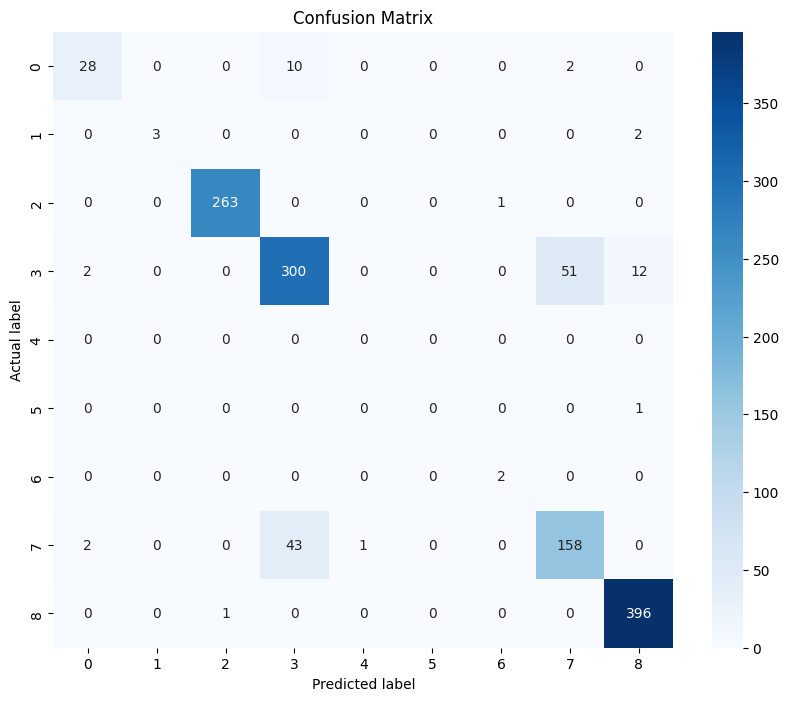

In [51]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()